Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

First 5 Rows:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   

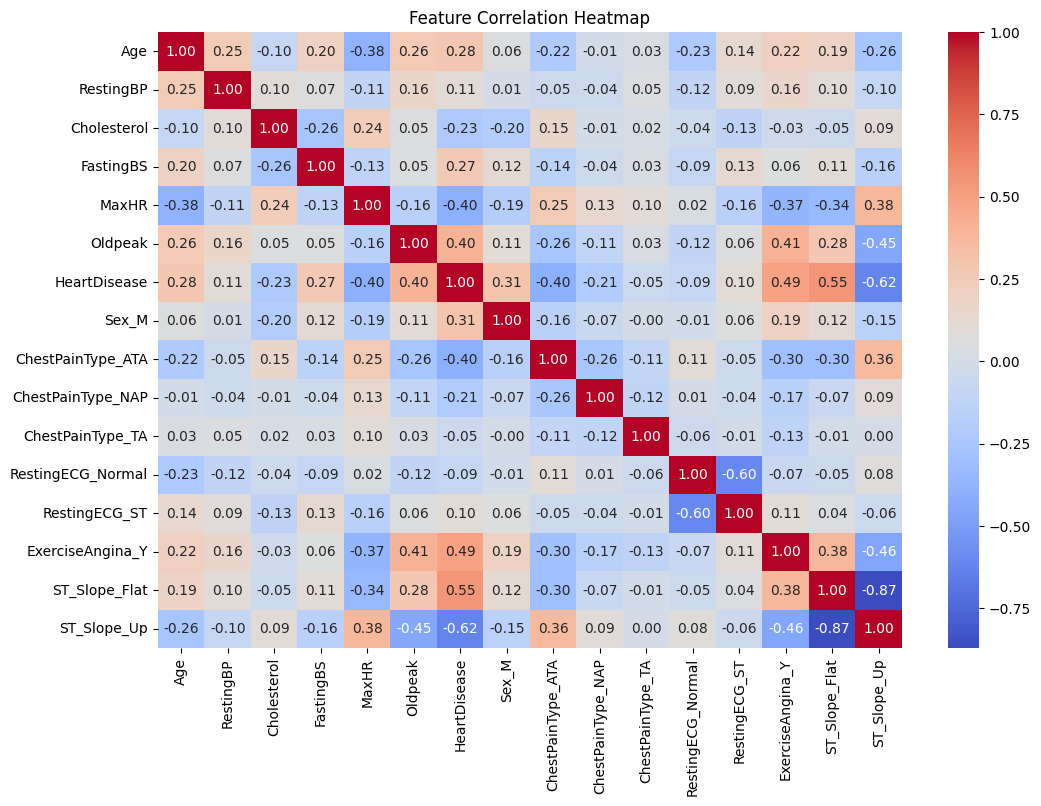

<ipython-input-2-3c972e9e018f>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_encoded['HeartDisease'], palette="Set1")


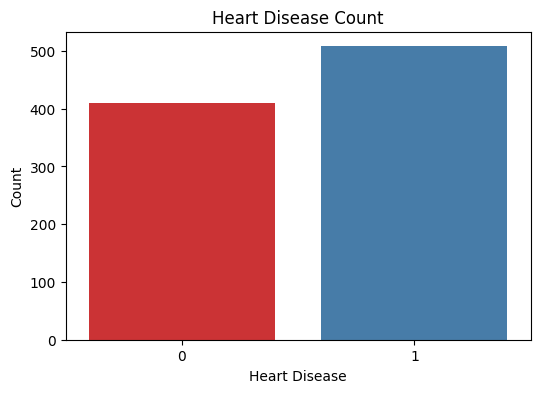


Random Forest Accuracy: 0.88

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



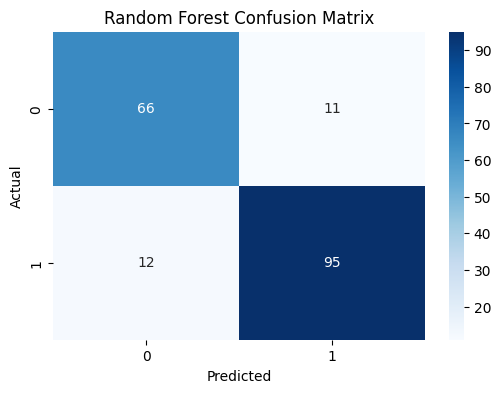

<ipython-input-2-3c972e9e018f>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_importances, palette="viridis")


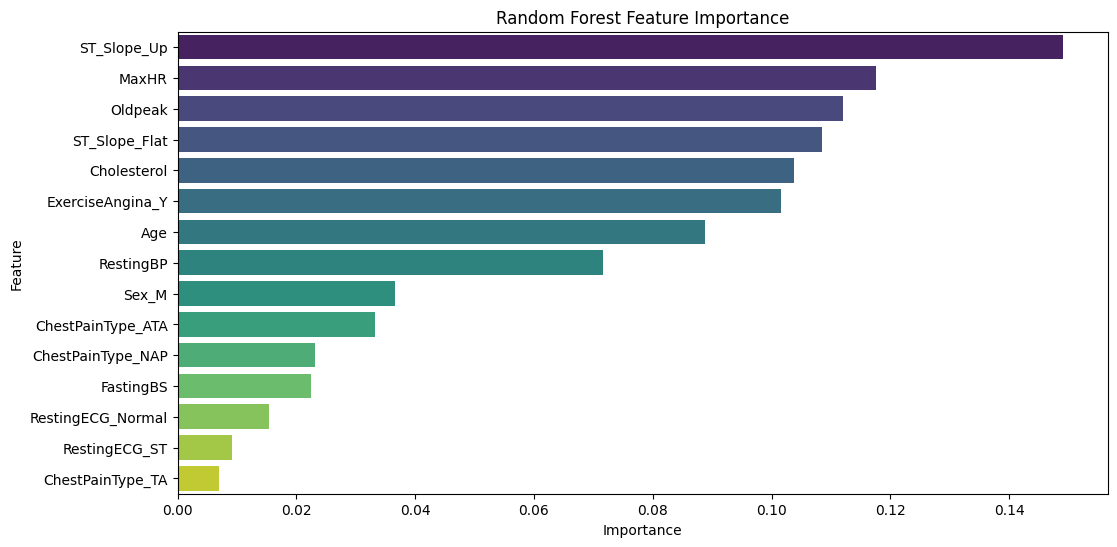

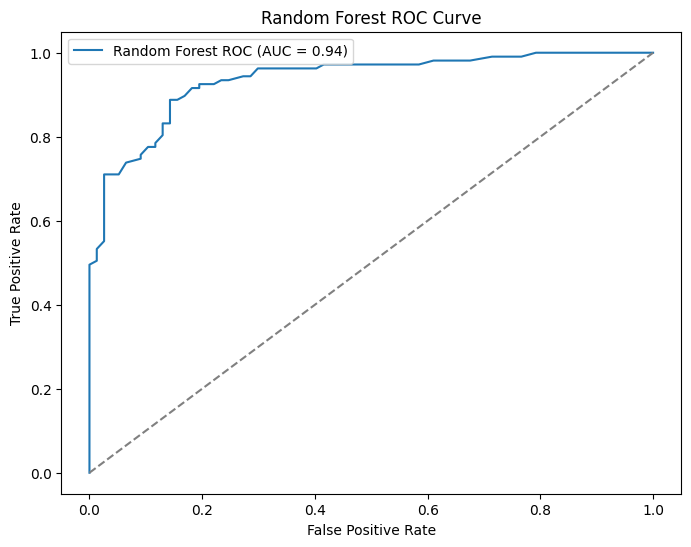


Decision Tree Accuracy: 0.83

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79        77
           1       0.86      0.84      0.85       107

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



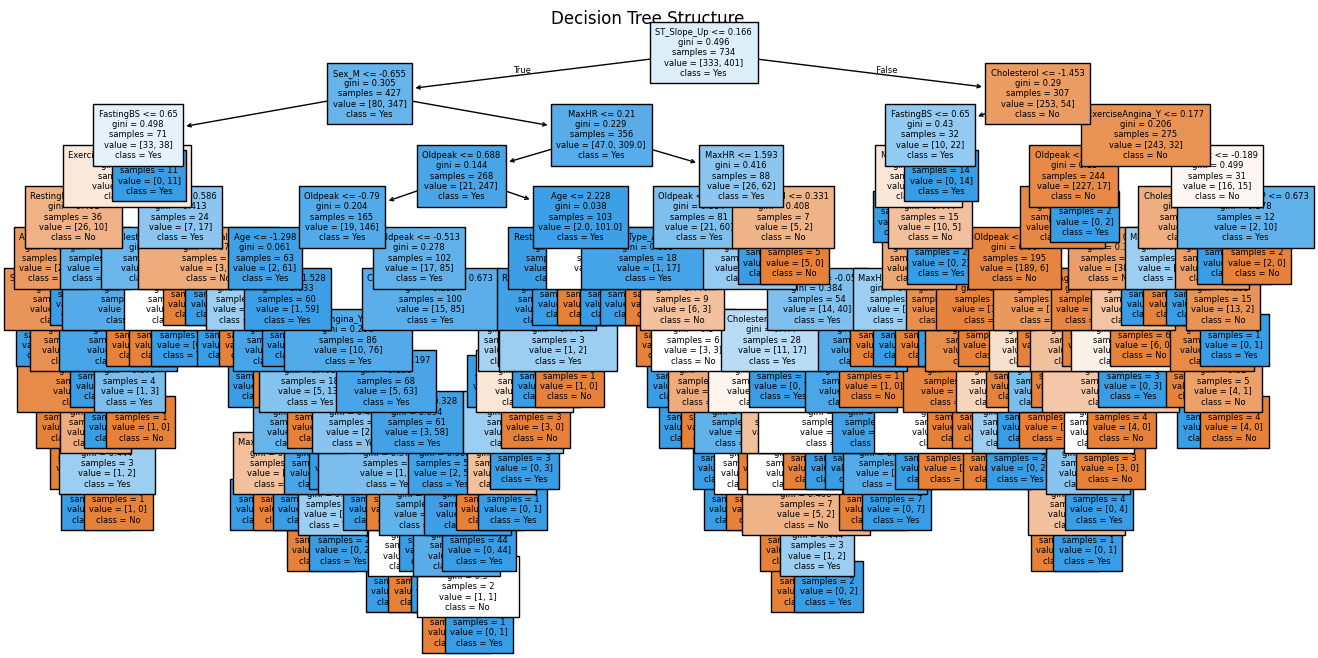


Logistic Regression Accuracy: 0.85

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184


Logistic Regression Coefficients:
Age: 0.1390
RestingBP: 0.0328
Cholesterol: -0.5225
FastingBS: 0.4275
MaxHR: -0.1022
Oldpeak: 0.4883
Sex_M: 0.5404
ChestPainType_ATA: -0.5738
ChestPainType_NAP: -0.6253
ChestPainType_TA: -0.2314
RestingECG_Normal: -0.1020
RestingECG_ST: -0.1802
ExerciseAngina_Y: 0.5367
ST_Slope_Flat: 0.6561
ST_Slope_Up: -0.5459
Intercept: 0.2717


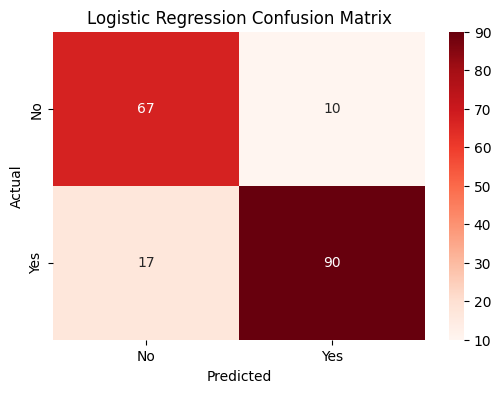

<ipython-input-2-3c972e9e018f>:159: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette="coolwarm")


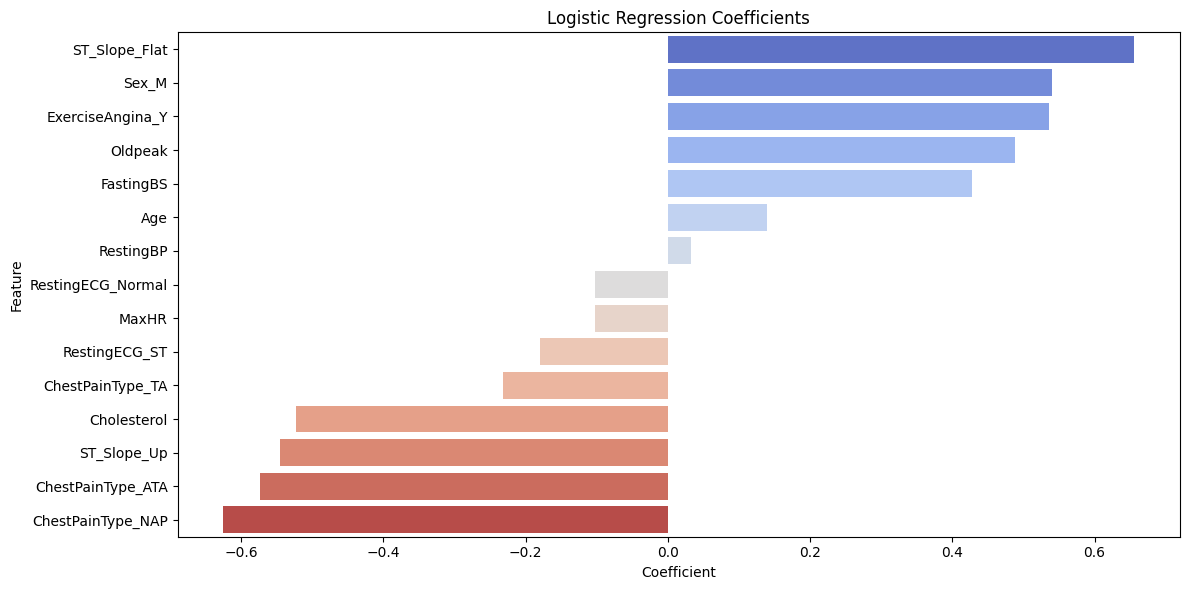

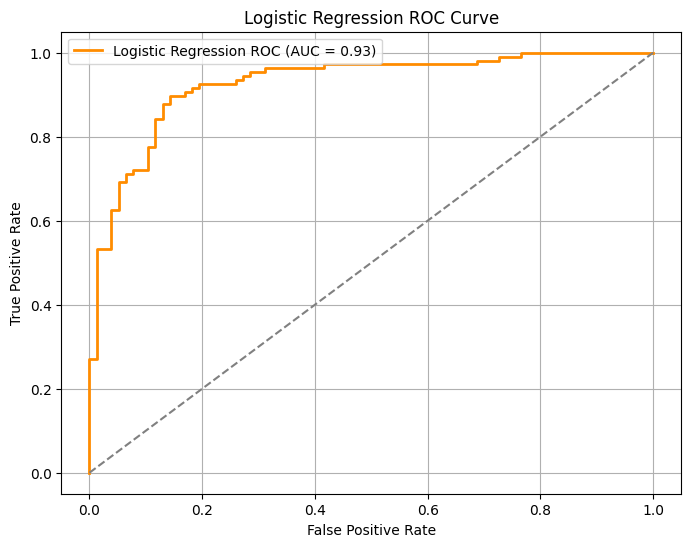


=== Model Comparison ===
Random Forest Accuracy      : 0.88
Decision Tree Accuracy      : 0.83
Logistic Regression Accuracy: 0.85
SVM Accuracy                : 0.88

LIMITATIONS & FUTURE WORK
- Random Forest and Decision Tree models may overfit without pruning/tuning.
- Logistic Regression is interpretable but might underperform on non-linear data.
- Class imbalance handling and SMOTE can improve results.
- Further feature engineering and dimensionality reduction (e.g., PCA) can be explored.


In [2]:
# ============================================
# IMPORT REQUIRED LIBRARIES
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# ============================================
# LOAD AND EXPLORE DATA
# ============================================
df = pd.read_csv('/content/heart.csv')

print("Dataset Information:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nSummary Statistics:")
print(df.describe())

# ============================================
# DATA PREPROCESSING
# ============================================
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Visualizations
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x=df_encoded['HeartDisease'], palette="Set1")
plt.title("Heart Disease Count")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()

# ============================================
# DATA SPLIT & SCALING
# ============================================
X = df_encoded.drop(columns=['HeartDisease'])
y = df_encoded['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============================================
# RANDOM FOREST CLASSIFIER
# ============================================
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"\nRandom Forest Accuracy: {rf_accuracy:.2f}")
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
rf_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
rf_importances = rf_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importances, palette="viridis")
plt.title("Random Forest Feature Importance")
plt.show()

# ROC Curve
y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Random Forest ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# ============================================
# DECISION TREE CLASSIFIER
# ============================================
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)

dt_acc = accuracy_score(y_test, dt_pred)
print(f"\nDecision Tree Accuracy: {dt_acc:.2f}")
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_pred))

plt.figure(figsize=(16, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=["No", "Yes"], filled=True, fontsize=6)
plt.title("Decision Tree Structure")
plt.show()

# ============================================
# LOGISTIC REGRESSION
# ============================================
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_prob = lr_model.predict_proba(X_test_scaled)[:, 1]

lr_acc = accuracy_score(y_test, lr_pred)
print(f"\nLogistic Regression Accuracy: {lr_acc:.2f}")
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))

# Coefficients
print("\nLogistic Regression Coefficients:")
for coef, name in zip(lr_model.coef_[0], X.columns):
    print(f"{name}: {coef:.4f}")
print(f"Intercept: {lr_model.intercept_[0]:.4f}")

# === Logistic Regression Visualizations ===

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt="d", cmap="Reds", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Coefficient Plot
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_[0]})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette="coolwarm")
plt.title("Logistic Regression Coefficients")
plt.tight_layout()
plt.show()

# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_prob)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'Logistic Regression ROC (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Logistic Regression ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# ============================================
# SUPPORT VECTOR MACHINE (OPTIONAL COMPARISON)
# ============================================
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, svm_pred)

# ============================================
# MODEL COMPARISON SUMMARY
# ============================================
print("\n=== Model Comparison ===")
print(f"Random Forest Accuracy      : {rf_accuracy:.2f}")
print(f"Decision Tree Accuracy      : {dt_acc:.2f}")
print(f"Logistic Regression Accuracy: {lr_acc:.2f}")
print(f"SVM Accuracy                : {svm_acc:.2f}")

# ============================================
# LIMITATIONS & FUTURE WORK
# ============================================
print("\nLIMITATIONS & FUTURE WORK")
print("- Random Forest and Decision Tree models may overfit without pruning/tuning.")
print("- Logistic Regression is interpretable but might underperform on non-linear data.")
print("- Class imbalance handling and SMOTE can improve results.")
print("- Further feature engineering and dimensionality reduction (e.g., PCA) can be explored.")
